# **Predicción de Calidad del Vino (Core)**

### **Objetivo**

Utilizar técnicas de clasificación aprendidas hasta el momento para predecir la calidad del vino basándose en características físico-químicas. Este ejercicio permitirá aplicar conceptos como la selección de características, preprocesamiento de datos, entrenamiento y evaluación de modelos de clasificación, y análisis de resultados mediante métricas y visualizaciones.

**Dataset: Wine Quality Dataset**



**Descripción del Dataset:** Este conjunto de datos contiene información sobre distintas características físico-químicas de muestras de vino tinto y su calidad asociada. Las características incluyen acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos y alcohol. La calidad del vino está clasificada en una escala del 0 al 10.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Instrucciones

### **1. Carga y Exploración de Datos:**

- Cargar el dataset y revisar su estructura básica.
- Describir las variables y su distribución.
- Identificar y tratar valores nulos y outliers.


In [4]:
# Se importan las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

**Cargar el dataset y revisar su estructura básica.**

In [5]:
# Cargamos dataset a un dataframe
path = "/content/drive/MyDrive/Colab Notebooks/BD/WineQT.csv"
df = pd.read_csv(path)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


**Describir las variables y su distribución.**

In [6]:
# Las características incluyen acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos y alcohol. La calidad del vino está clasificada en una escala del 0 al 10
# Estadistica de las columnas
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


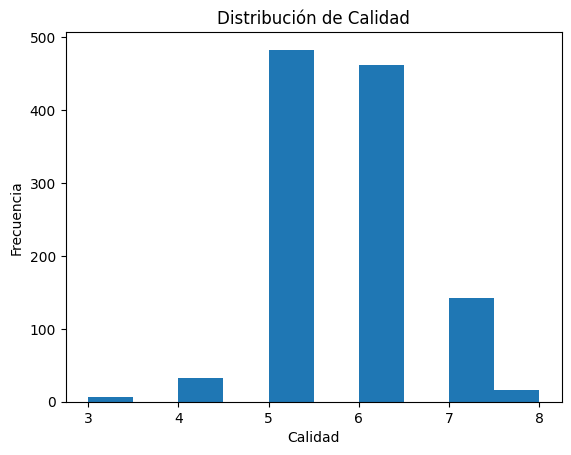

In [7]:
# Grafico para ver como se distribuye la calidad (quality) de los vinos

plt.hist(df['quality'], bins=10)
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Calidad')
plt.show()


Según este gráfico los valores de calidad 5 y 6 son los predominantes en la muestra analizada

In [8]:
df["quality"].value_counts()

,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


Se valida lo que muestra el grafico anterior , realizando la cuenta de registros por calidad.

([<matplotlib.axis.YTick at 0x7faa13e96290>,
 [Text(0, 0, 'fixed acidity'),
  Text(0, 1, 'volatile acidity'),
  Text(0, 2, 'citric acid'),
  Text(0, 3, 'residual sugar'),
  Text(0, 4, 'chlorides'),
  Text(0, 5, 'free sulfur dioxide'),
  Text(0, 6, 'total sulfur dioxide'),
  Text(0, 7, 'density'),
  Text(0, 8, 'pH'),
  Text(0, 9, 'sulphates'),
  Text(0, 10, 'alcohol'),
  Text(0, 11, 'quality'),
  Text(0, 12, 'Id')])

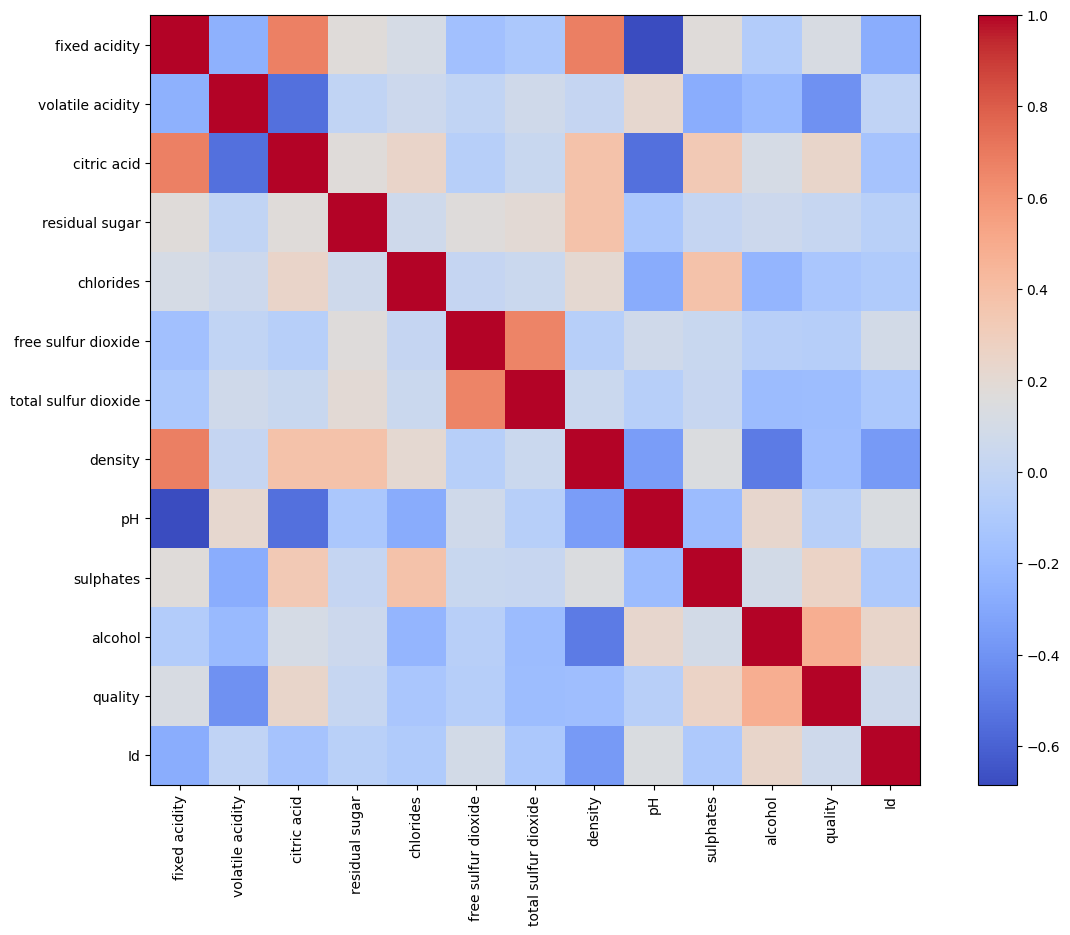

In [9]:
# diagrama de calor de las variables
plt.figure(figsize=(15, 10))
plt.imshow(df.corr(), cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)

Se evidencia relacion entre algunas variables, como fixed acidity con density, como tambien entre free sulfur dioxide y total sulfur dioxide

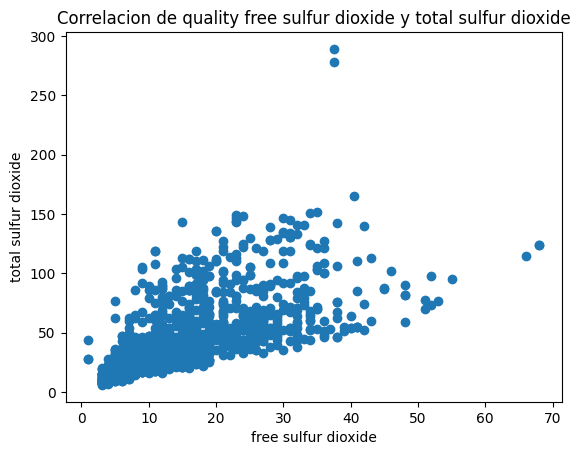

In [10]:
# grafico que muestra la relacion entre las columnas alcohol y quality free sulfur dioxide y total sulfur dioxide
plt.scatter(df['free sulfur dioxide'], df['total sulfur dioxide'])
plt.xlabel('free sulfur dioxide')
plt.ylabel('total sulfur dioxide')
plt.title('Correlacion de quality free sulfur dioxide y total sulfur dioxide')
plt.show()

**Identificar y tratar valores nulos y outliers.**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [12]:
# Se validan los datos nulos
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


No se evidencian datos nulos

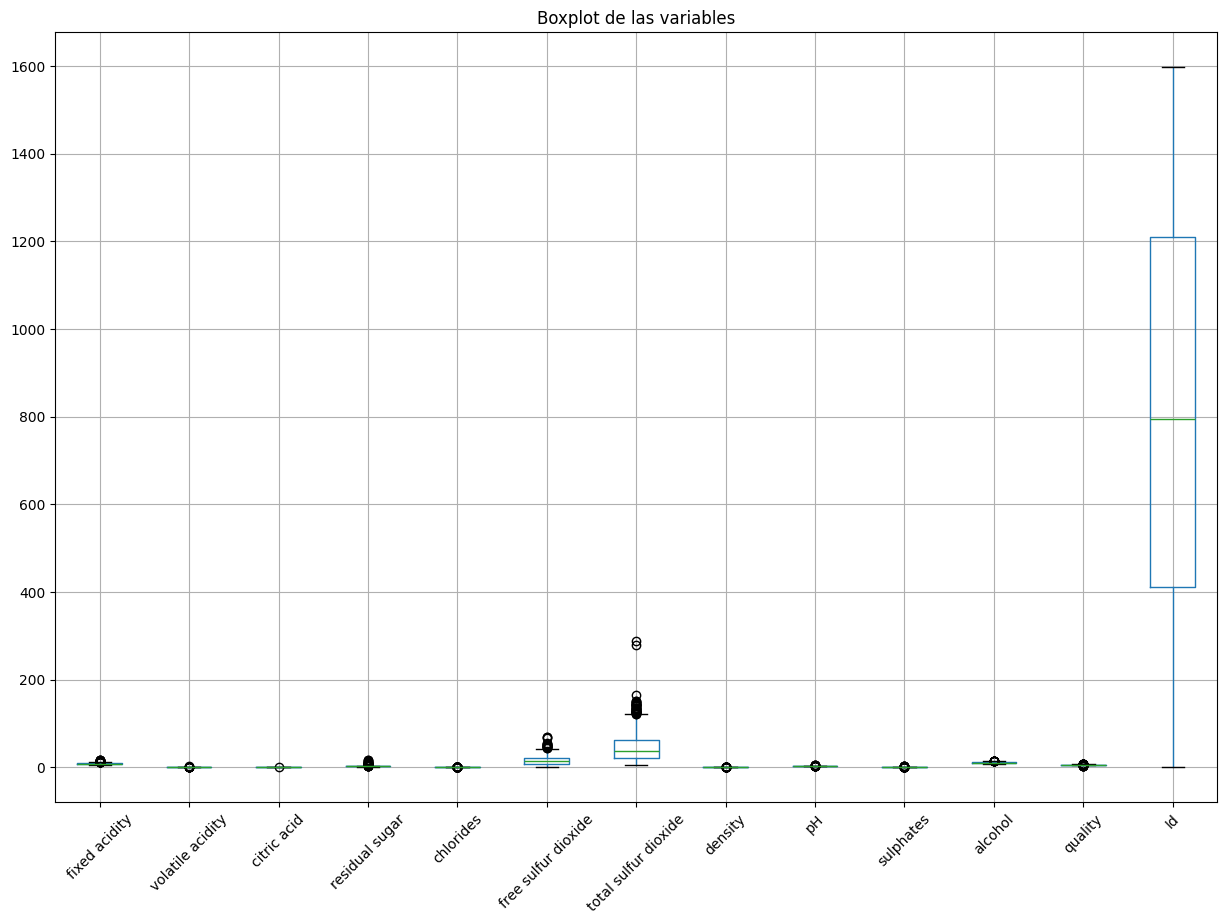

In [13]:
# graficos boxplot de las variables

import matplotlib.pyplot as plt
# graficos boxplot de las variables del dataframe
plt.figure(figsize=(15, 10))
df.boxplot()
plt.title('Boxplot de las variables')
plt.xticks(rotation=45)
plt.show()

Se observan 2 columnas con valores outliers. Las columnas "free sulfur dioxide" y "total sulfur dioxide"

(array([1, 2]),
 [Text(1, 0, 'free sulfur dioxide'), Text(2, 0, 'total sulfur dioxide')])

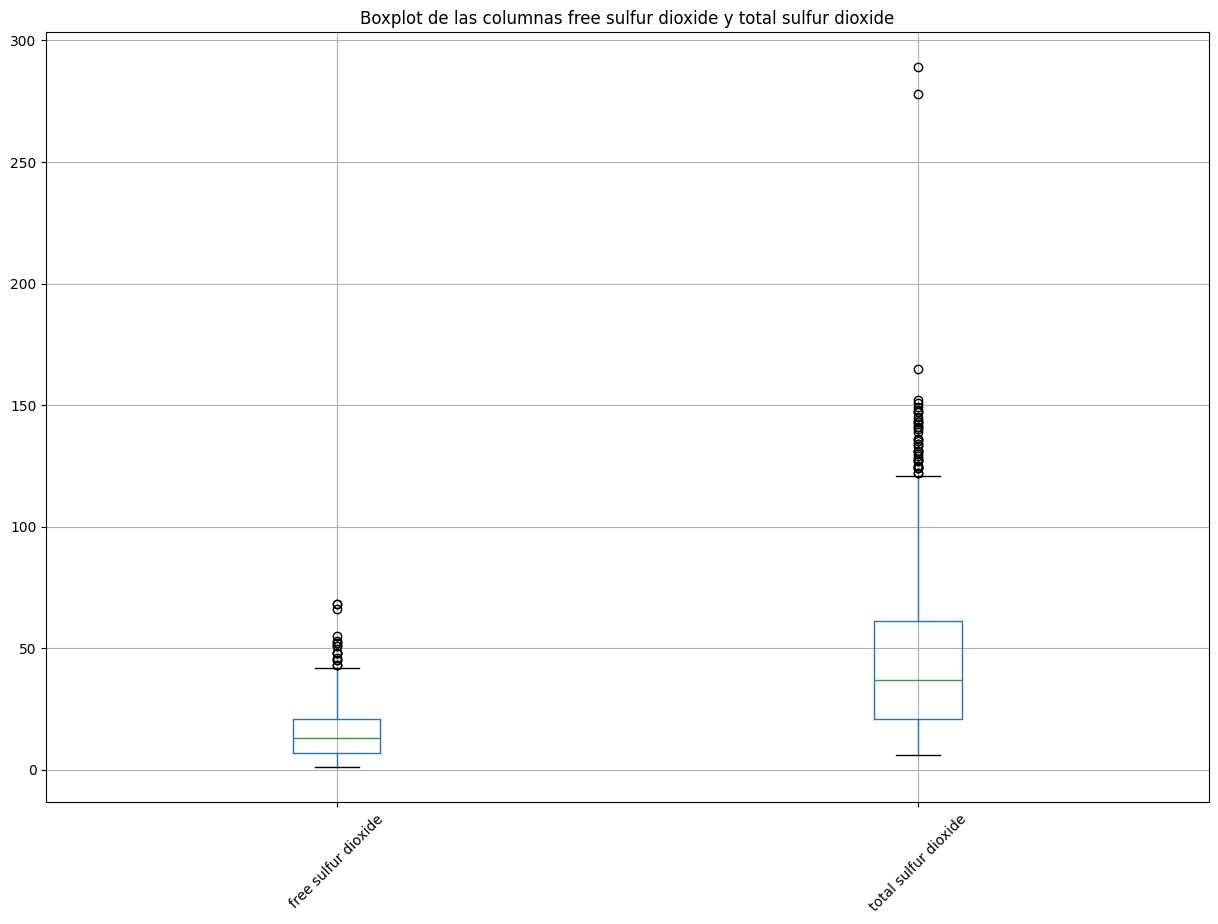

In [14]:
# grafico boxplot de las columnas free sulfur dioxide	y total sulfur dioxide
plt.figure(figsize=(15, 10))
df.boxplot(column=['free sulfur dioxide', 'total sulfur dioxide'])
plt.title('Boxplot de las columnas free sulfur dioxide y total sulfur dioxide')
plt.xticks(rotation=45)

Como no sabemos si estos datos corresponden, se mantandrán en el df.

### **2. Preprocesamiento de Datos:**

- Seleccionar características importantes para la clasificación.
- Transformar variables categóricas en variables numéricas si es necesario.
- Dividir los datos en conjuntos de entrenamiento y prueba.
- Escalar las características.

**Seleccionar características importantes para la clasificación**

In [15]:
# Se reaiza la asignación para el Train y Test
X = df.drop(columns=["quality","Id"])
y = df["quality"]


**Transformar variables categóricas en variables numéricas si es necesario.**

No existenvariables categoricas, or lo que no es necesario este paso

**Dividir los datos en conjuntos de entrenamiento y prueba.**

In [16]:
#Se asigna el 80% para entrenar y 20% para validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Entrenamiento de Modelos de Clasificación:

- Entrenar al menos tres modelos de clasificación diferentes (por ejemplo, KNN, RandomForest, y Regresión Logística).
- Utilizar validación cruzada para seleccionar los mejores hiperparámetros.

**Entrenar al menos tres modelos de clasificación diferentes.**

- Arbol de Decision
- KNN
- RandomForest

In [17]:
# Obtenemos el listado de columnas predictoras, todas numericas, para scalar
num_cols = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

In [18]:
# Definir transformadores.
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols),
])

**Arbol de Decision**

In [19]:
# Se crea pipeline para Arbol de Decision.
pipeline_tree = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", DecisionTreeClassifier())
])

In [20]:
# Estructura del Pipeline
pipeline_tree

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('classifier', DecisionTreeClassifier())])

In [21]:
# Entrenamiento del modelo
pipeline_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('classifier', DecisionTreeClassifier())])

**KNN**

In [22]:
# Pipeline para KNN.
pipeline_knn = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", KNeighborsClassifier())
])

In [23]:
# Estructura del Pipeline
pipeline_knn

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('classifier', KNeighborsClassifier())])

In [24]:
# Se entrena modelo KNN
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('classifier', KNeighborsClassifier())])

**Random Forest**

In [25]:
# Pipeline para KNN.
pipeline_rf = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier())
])

In [26]:
# Estructura del Pipeline
pipeline_rf

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('classifier', RandomForestClassifier())])

In [27]:
# Entrenamiento del modelo Random Forest
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('classifier', RandomForestClassifier())])

### **4. Evaluación de Modelos:**

- Evaluar los modelos utilizando métricas como exactitud, precisión, recall, F1-Score y matriz de confusión.
- Generar un informe de clasificación para cada modelo.
- Crear y visualizar la curva ROC y calcular el AUC para el mejor modelo.

**Evaluar los modelos utilizando métricas como exactitud, precisión, recall, F1-Score y matriz de confusión.**

In [28]:
# Prueba de los modelos
y_pred_tree = pipeline_tree.predict(X_test)
y_pred_knn = pipeline_knn.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)


In [29]:
# Evaluar los modelos utilizando métricas como exactitud, precisión, recall, F1-Score y matriz de confusión.
# Acuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [30]:
# Se imprimen los resultados
print("Accuracy Arbol de Decision:", accuracy_tree)
print("Accuracy KNN:", accuracy_knn)
print("Accuracy Random Forest:", accuracy_rf)

Accuracy Arbol de Decision: 0.5589519650655022
Accuracy KNN: 0.5589519650655022
Accuracy Random Forest: 0.6681222707423581


In [31]:
# Matriz de confusión
cm_tree = confusion_matrix(y_test, y_pred_tree)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_rf = confusion_matrix(y_test, y_pred_rf)

In [34]:
# Visualización de matrices
print("Matriz de confusión Arbol de Decision:\n", cm_tree)
print("Matriz de confusión KNN:\n", cm_knn)
print("Matriz de confusión Random Forest:\n", cm_rf)

Matriz de confusión Arbol de Decision:
 [[ 0  0  0  0  0  0]
 [ 0  2  2  1  1  0]
 [ 1  4 58 31  2  0]
 [ 1  1 28 52 15  2]
 [ 0  0  0 13 13  0]
 [ 0  0  0  0  1  1]]
Matriz de confusión KNN:
 [[ 0  4  2  0  0]
 [ 2 66 28  0  0]
 [ 1 34 55  9  0]
 [ 0  5 14  7  0]
 [ 0  0  2  0  0]]
Matriz de confusión Random Forest:
 [[ 0  3  3  0  0]
 [ 0 76 19  1  0]
 [ 0 30 62  7  0]
 [ 0  0  8 18  0]
 [ 0  0  2  0  0]]


**Generar un informe de clasificación para cada modelo**

In [32]:
# Reporte por cada modelo
report_tree = classification_report(y_test, y_pred_tree)
report_knn = classification_report(y_test, y_pred_knn)
report_rf = classification_report(y_test, y_pred_rf)

# Imprimir los reportes
print("Informe de clasificación Arbol de Decision:\n", report_tree)
print("Informe de clasificación KNN:\n", report_knn)
print("Informe de clasificación Random Forest:\n", report_rf)


Informe de clasificación Arbol de Decision:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.17      0.17      0.17         6
           5       0.68      0.62      0.65        96
           6       0.55      0.55      0.55        99
           7       0.41      0.50      0.45        26
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
   macro avg       0.30      0.31      0.30       229
weighted avg       0.57      0.56      0.56       229

Informe de clasificación KNN:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.61      0.69      0.64        96
           6       0.54      0.56      0.55        99
           7       0.44      0.27      0.33        26
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

CONCLUSION: De acuerdo a lo anteriormente analizado, Random Forest es el modelo de mejor rendimiento: Entre los tres, el Random Forest muestra la capacidad más fuerte para clasificar la calidad del vino, especialmente en las clases de calidad media (probablemente las más abundantes en el dataset). Sus mayores números en la diagonal principal y menores errores fuera de ella lo demuestran.

**Crear y visualizar la curva ROC y calcular el AUC para el mejor modelo.**


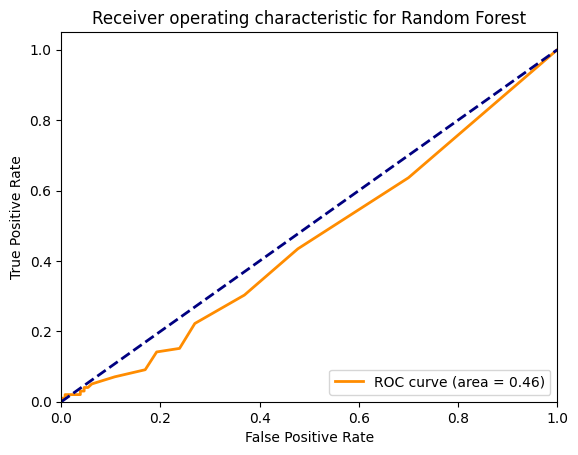

In [40]:
# Se calcula la curva de ROC y AUC para el modelo de Ramdom Forest
y_scores_rf = pipeline_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf, pos_label=6) # Assuming '6' is the positive class
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Se grafica la curva de ROC de Ramdom Forest
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Random Forest')
plt.legend(loc="lower right")
plt.show()

En resumen, la curva ROC con un AUC de 0.46 sugiere que el modelo Random Forest tiene problemas para distinguir las clases, que podría ser por un desbalance o definición de clases que el modelo no puede aprender con las características dadas.
Es posible que el EDA no haya generado un dataset optimo.

### **5. Análisis y Comparación de Resultados:**

- Comparar el rendimiento de los diferentes modelos.
- Discutir cuál modelo ofrece el mejor rendimiento y por qué.
- Identificar las fortalezas y debilidades de cada enfoque en este contexto.

**Comparar el rendimiento de los diferentes modelos.**

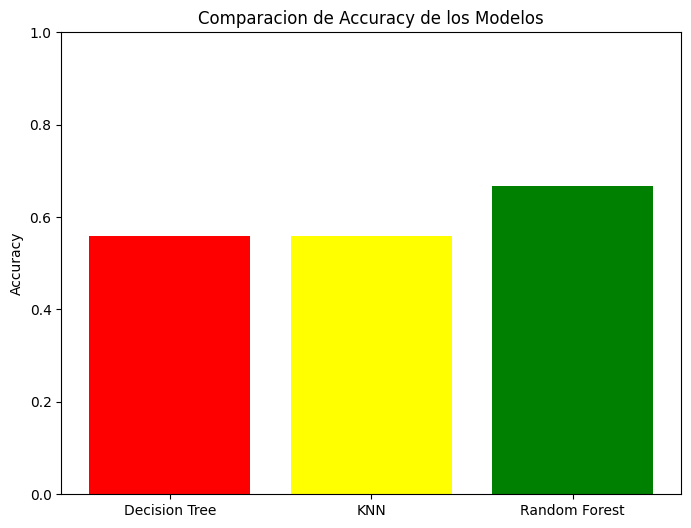

In [33]:
# Se visualiza en un grafico de barra los accuracy a fin de ver los resultados
models = ['Decision Tree', 'KNN', 'Random Forest']
accuracies = [accuracy_tree, accuracy_knn, accuracy_rf]

# Grafico de barra
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['red', 'yellow', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparacion de Accuracy de los Modelos')
plt.ylim(0, 1) # seteamos los ejes
plt.show()

### **6. Repositorio en GitHub:**

- Crear un repositorio en GitHub con el código y los resultados del análisis.
- Crear un tag de liberación con una breve descripción de la versión final del proyecto.


### **Adicional**

- Añadir un archivo README.md en el repositorio de GitHub que explique el propósito del proyecto, las técnicas utilizadas y cómo ejecutar el código.
- Incluir una presentación o informe detallado en formato PDF con todos los hallazgos y conclusiones del análisis.


**Nota:** Asegúrate de documentar cada paso del proceso, incluyendo la justificación de las decisiones tomadas durante el preprocesamiento, la selección de modelos y la evaluación de los resultados. Esto proporcionará una visión completa y estructurada del trabajo realizado.